# CNN PROJECT

by Tamsyn Evezard

11/01/2024

## Overview

This project builds and experiments on a classifier for a multiclass image dataset, CIFAR-10 - specifically a convolutional neural network (CNN) that uses convolutional and fully connected layers. 

### Experiment 1: Comparing ANN and CNN
### Experiment 2: Line Search
- Experiment 2A: Kernel Size
- Experiment 2B: Max Pooling Size
- Experiment 2C: Convolutional Filters Per Layer
- Experiment 2D: Number of Convolutional Layers
### Experiment 3: Examining The First Layer

### Setting Up
- import dependencies
- load data
- normalize data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-10-30 20:27:11.264411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/tamsynevezard/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tamsynevezard/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

### Let's plot the first image & label

In [3]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
def plot_pic(x, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

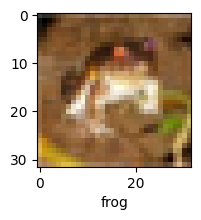

In [7]:
plot_pic(x_train, y_train, 0)

In [5]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

## Experiment 1: Comparing ANN vs CNN

In our MLP project we created a multi-layer perceptron to classify the MNIST digits. Since this project is centered around CNNs, let us see the difference in accuracy between a simple ANN and CNN for classifying the CIFAR-10 images.

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2575 - loss: 2.0439 - val_accuracy: 0.3683 - val_loss: 1.7812
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3690 - loss: 1.7761 - val_accuracy: 0.3956 - val_loss: 1.7033
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3993 - loss: 1.6989 - val_accuracy: 0.3936 - val_loss: 1.7001
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4232 - loss: 1.6368 - val_accuracy: 0.4163 - val_loss: 1.6245
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4331 - loss: 1.6011 - val_accuracy: 0.4388 - val_loss: 1.5982
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 59ms/step - accuracy: 0.3752 - loss: 1.6991 - val_accuracy: 0.5587 - val_loss: 1.2256
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.5829 - loss: 1.1713 - val_accuracy: 0.6223 - val_loss: 1.0886
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6399 - loss: 1.0271 - v

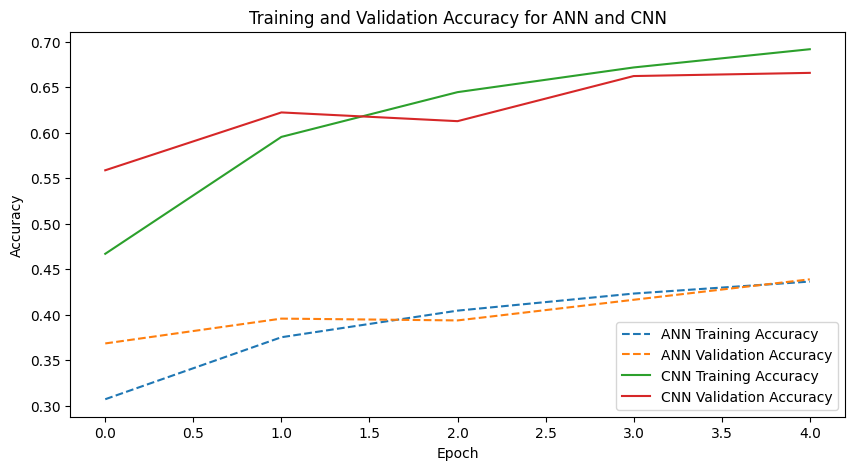

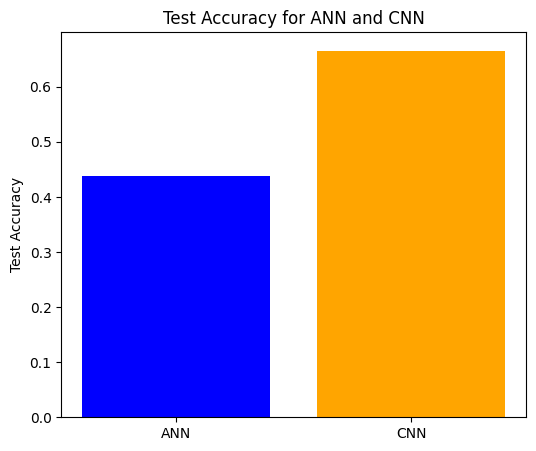

In [14]:
# ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann_history = ann.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
ann_test_accuracy = ann.evaluate(x_test, y_test, verbose=0)[1]

# CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn_history = cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
cnn_test_accuracy = cnn.evaluate(x_test, y_test, verbose=0)[1]

# Plot training and validation accuracy for ANN and CNN
plt.figure(figsize=(10, 5))
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy', linestyle='--')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy', linestyle='--')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', linestyle='-')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='-')
plt.title('Training and Validation Accuracy for ANN and CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot test accuracy for ANN and CNN
plt.figure(figsize=(6, 5))
plt.bar(['ANN', 'CNN'], [ann_test_accuracy, cnn_test_accuracy], color=['blue', 'orange'])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for ANN and CNN')
plt.show()


## Experiment 1: Comments

Although the difference in accuracy may seem obvious between image recognition with ANNs vs CNNs, it is interesting to see the degree of improvement after so little epochs. Already after 5 epochs we can see that the CNN is significantly better with the accuracy of test results compared to an ANN. Accuracy increased by about 20% from 45% to about 65% test accuracy. This is a clear indication of the reason behind using CNNs for image processing.

## Experiment 2A: Kernel Size

In class, we discussed the impact of adjusting the kernel size used in convolutional neural networks. The consensus was: depending on the environment & purpose of your CNN, certain tradeoffs appear when choosing different kernel sizes. I would like to explore this further specifically with my CNN for the CIFAR-10 dataset.

In this experiment I will create 3 CNN's using a 3x3, 5x5, and 7x7 kernel size respectively for the first convolutional layer to determine the effect on accuracy and training time.

In [6]:
# Specify kernel size and max pooling size when creating CNN
def create_cnn(k_size, mp_size):
    cnn = models.Sequential([
        # First layer with the specified kernel size
        layers.Conv2D(filters=32, kernel_size=k_size, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(mp_size),

        # Using a smaller kernel size for subsequent layers
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn

<b>NOTE:</b> for the kernel size, I can only adjust the first layer for line search and set the middle layer parameters to prevent over-reducing the feature map dimensions, which helps avoid size-related errors. I have also limited the training of each model to 5 epochs, due to the core purpose of these experiments being to show the difference between the performance of the CNNs based on the parameter being changed for the line search. 

In [18]:
# Creating models with different initial kernel sizes
cnn_3x3 = create_cnn((3,3), (2,2))
cnn_5x5 = create_cnn((5,5), (2,2))
cnn_7x7 = create_cnn((7,7), (2,2))

Training model with 3x3 kernel...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 72ms/step - accuracy: 0.3538 - loss: 1.7394 - val_accuracy: 0.5475 - val_loss: 1.2619
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5647 - loss: 1.2276 - val_accuracy: 0.6112 - val_loss: 1.1092
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.6333 - loss: 1.0433 - val_accuracy: 0.6509 - val_loss: 1.0059
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6711 - loss: 0.9382 - val_accuracy: 0.6689 - val_loss: 0.9366
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.7031 - loss: 0.8469 - val_accuracy: 0.6853 - val_loss: 0.9041
Training model with 5x5 kernel...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.3528 - loss: 1.7481 - val_accuracy: 0.5371 - val_loss: 1.2711
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.5681 - loss: 1.2200 - val_accuracy: 0.5995 - val_loss: 1.1299
Epoch 3/5


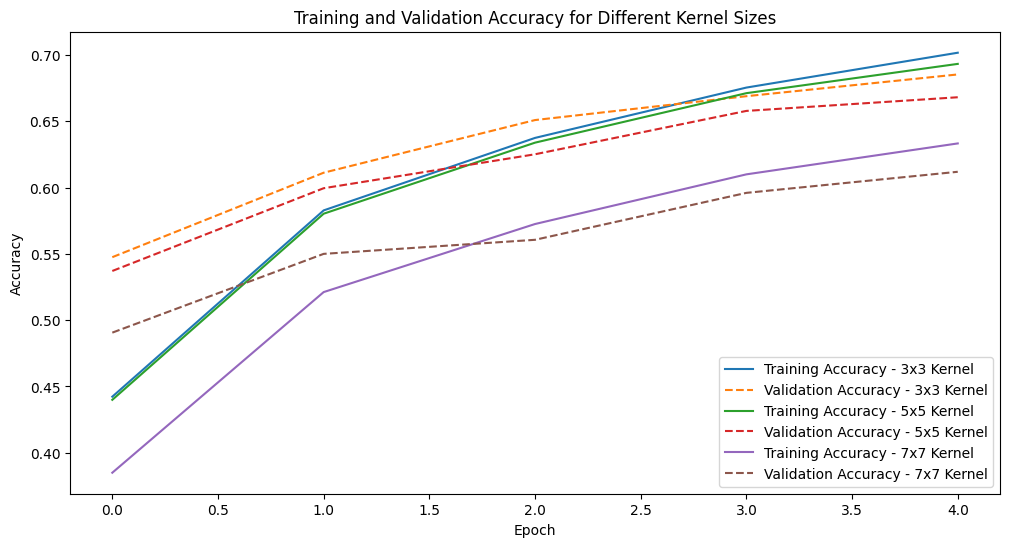

In [19]:
import time
import matplotlib.pyplot as plt

# Variables to store results
training_times = []
test_accuracies = []
kernel_sizes = [3, 5, 7]
models = [cnn_3x3, cnn_5x5, cnn_7x7]
histories = []

# Train each model & record training time & accuracy
for idx, model in enumerate(models):
    print(f"Training model with {kernel_sizes[idx]}x{kernel_sizes[idx]} kernel...")

    start_time = time.time()
    
    # Train the model and save the history
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    histories.append(history)

    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Record test accuracy from last epoch
    test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracies.append(test_accuracy)

# Combined plot for training and test accuracy over epochs for each kernel size
plt.figure(figsize=(12, 6))

for idx, history in enumerate(histories):
    kernel_size_label = f"{kernel_sizes[idx]}x{kernel_sizes[idx]} Kernel"
    
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {kernel_size_label}')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Validation Accuracy - {kernel_size_label}')

plt.title("Training and Validation Accuracy for Different Kernel Sizes")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Experiment 2A: Comments

There is not much difference in training accuracy between the 3x3 and 5x5 kernel, however, the 3x3 kernel reaches the best accuracy, supporting the fact that it is used as the default kernel size for CNNs. There is a clear gap in accuracy for the 7x7 kernel compared to the other two.

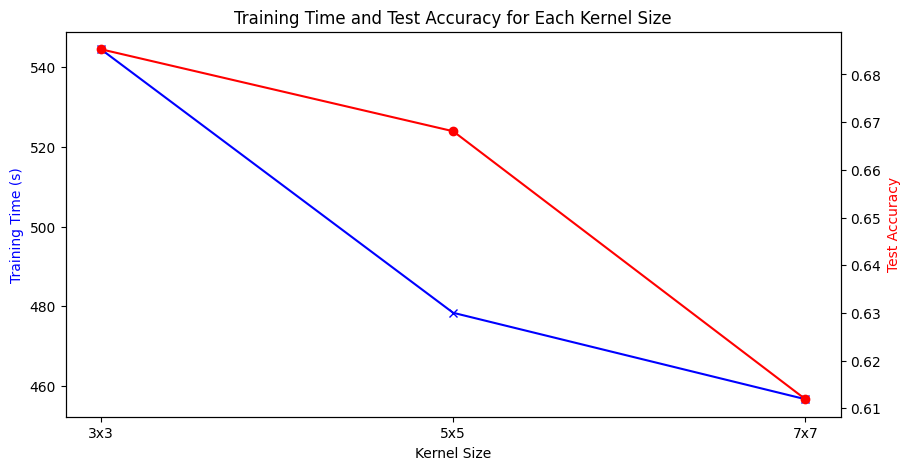

In [20]:
# Plot combined training time and test accuracy for each kernel size
fig, ax1 = plt.subplots(figsize=(10, 5))

# Training times
ax1.plot([str(k) + 'x' + str(k) for k in kernel_sizes], training_times, color='blue', marker='x', label="Training Time (s)")
ax1.set_xlabel("Kernel Size")
ax1.set_ylabel("Training Time (s)", color='blue')

# Test accuracies
ax2 = ax1.twinx()
ax2.plot([str(k) + 'x' + str(k) for k in kernel_sizes], test_accuracies, color='red', marker='o', label="Test Accuracy")
ax2.set_ylabel("Test Accuracy", color='red')

plt.title("Training Time and Test Accuracy for Each Kernel Size")
plt.show()


## Experiment 2A: Comments Continued

There is a tradeoff between test accuracy and training time when it comes to kernel size. As the kernel size increases, the test accuracy decreases, while the training time increases. This is because smaller kernel sizes allow the CNN model to capture more fine features and patterns, and going from layer to layer, this leads to the model more accurately representing the data (thus, a higher accuracy but longer time to train due to the "detail").

## Experiment 2B: Max Pooling Size

Here we will be testing the effect of max pooling size in the first convolutional layer of the CNN on the accuracy and training time of the CNN, comparing a 2x2 and 4x4 max pooling size. 

<b>NOTE: </b>Adding padding='same' in the convolutional layers resolves the dimension mismatch. This keeps the output dimensions consistent, allowing larger pooling sizes without causing negative dimensions in later layers.

Training model with 2x2 max pooling size...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 94ms/step - accuracy: 0.3832 - loss: 1.6729 - val_accuracy: 0.5986 - val_loss: 1.1294
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 85ms/step - accuracy: 0.6250 - loss: 1.0624 - val_accuracy: 0.6542 - val_loss: 0.9702
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6951 - loss: 0.8693 - val_accuracy: 0.6863 - val_loss: 0.9063
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.7358 - loss: 0.7632 - val_accuracy: 0.7145 - val_loss: 0.8253
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 138ms/step - accuracy: 0.7660 - loss: 0.6656 - val_accuracy: 0.7056 - val_loss: 0.8654
Training model with 4x4 max pooling size...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3507 - loss: 1.7505 - val_accuracy: 0.5760 - val_loss: 1.1716
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.5973 - loss: 1.1247 - val_accuracy: 0.6254 - val_lo

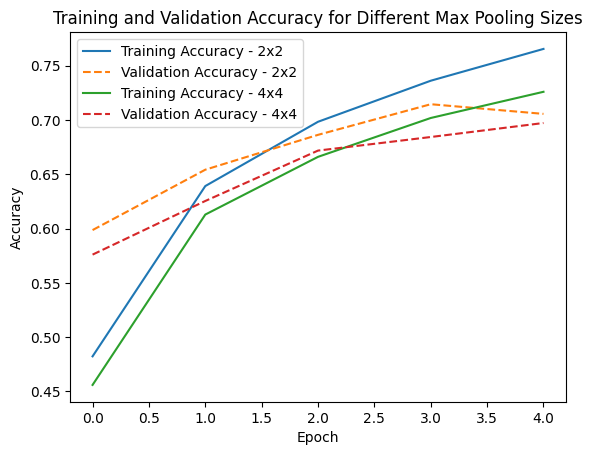

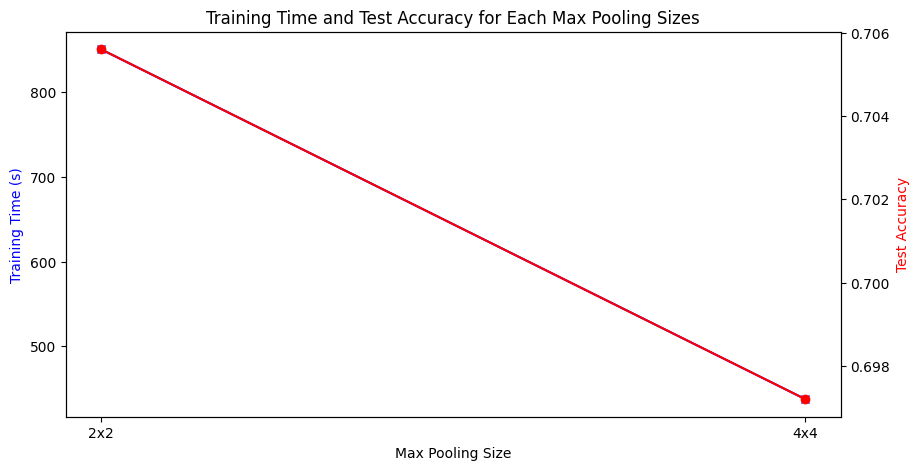

In [20]:
import matplotlib.pyplot as plt
import time
from tensorflow.keras import models, layers

def create_cnn_mp(k_size, mp_size):
    cnn = models.Sequential([
        # First layer with the specified kernel size
        layers.Conv2D(filters=32, kernel_size=k_size, activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(mp_size),

        # Using a smaller kernel size for subsequent layers
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn

# Prepare lists to store results
training_times = []
test_accuracies = []
max_pooling_sizes = [2, 4]

cnn_mp2x2 = create_cnn_mp((3,3), (2,2))
cnn_mp4x4 = create_cnn_mp((3,3), (4,4))
# Define models with different kernel sizes
models = [cnn_mp2x2, cnn_mp4x4]
histories = []

# Train each model and record training time and accuracy
for idx, model in enumerate(models):
    print(f"Training model with {max_pooling_sizes[idx]}x{max_pooling_sizes[idx]} max pooling size...")

    start_time = time.time()
    
    # Train the model and save the history
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    histories.append(history)
    
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Record test accuracy from last epoch
    test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracies.append(test_accuracy)

for idx, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {max_pooling_sizes[idx]}x{max_pooling_sizes[idx]}')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Validation Accuracy - {max_pooling_sizes[idx]}x{max_pooling_sizes[idx]}')

plt.title("Training and Validation Accuracy for Different Max Pooling Sizes")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Combined plot for training times and test accuracies
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot training times
ax1.plot([str(f) + 'x' + str(f) for f in max_pooling_sizes], training_times, color='blue', marker='x')
ax1.set_xlabel("Max Pooling Size")
ax1.set_ylabel("Training Time (s)", color='blue')

# Plot test accuracies
ax2 = ax1.twinx()
ax2.plot([str(f) + 'x' + str(f) for f in max_pooling_sizes], test_accuracies, color='red', marker='o')
ax2.set_ylabel("Test Accuracy", color='red')

plt.title("Training Time and Test Accuracy for Each Max Pooling Sizes")
plt.show()



## Experiment 2B: Comments

<b>NOTE:</b> I understand that the accuracy was still going up at the end of my graph, however, I have limited the training of each model to 5 epochs for the max pooling size experiment, due to the core purpose being to show the difference between the performance of the CNNs based on the parameter being changed for the line search. 

It is evident that 2x2 max pooling is superior to 4x4 max pooling (or larger), supporting the fact that it is used as the default max pooling size for CNNs. However, if we look at the graph of test accuracy and training time, we see another trade off. Using a 2x2 max pooling size results in higher test accuracy, by 2% after 5 epochs, but almost double the training time compared to the 4x4 max pooling. This is because a smaller max pooling size results in more defined recognition of intricate patterns and features, similar to our previous experiment with kernel size, leading to a higher accuracy in the end, but more time to pick up on these details. 

## Experiment 2C: Number of Convolutional Filters Per Layer

We will test the effect of the number of convolutional filters per layer on the accuracy and training time, specifically with the filter counts of 16, 32, 64, 128, and 256.

Training model with 16 filters in the first layer...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.3759 - loss: 1.7127 - val_accuracy: 0.5355 - val_loss: 1.3106
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5705 - loss: 1.2194 - val_accuracy: 0.6151 - val_loss: 1.1075
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6266 - loss: 1.0646 - val_accuracy: 0.6253 - val_loss: 1.0745
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6577 - loss: 0.9890 - val_accuracy: 0.6516 - val_loss: 1.0196
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6819 - loss: 0.9162 - val_accuracy: 0.6509 - val_loss: 1.0034
Training model with 32 filters in the first layer...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 61ms/step - accuracy: 0.3918 - loss: 1.6729 - val_accuracy: 0.5932 - val_loss: 1.1654
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6051 - loss: 1.1314 - val_accuracy: 0.6

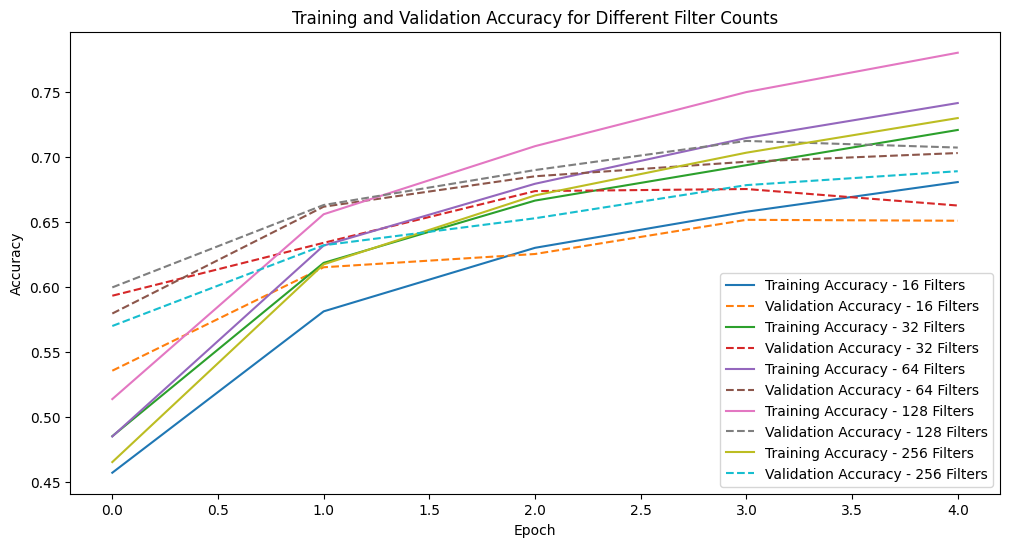

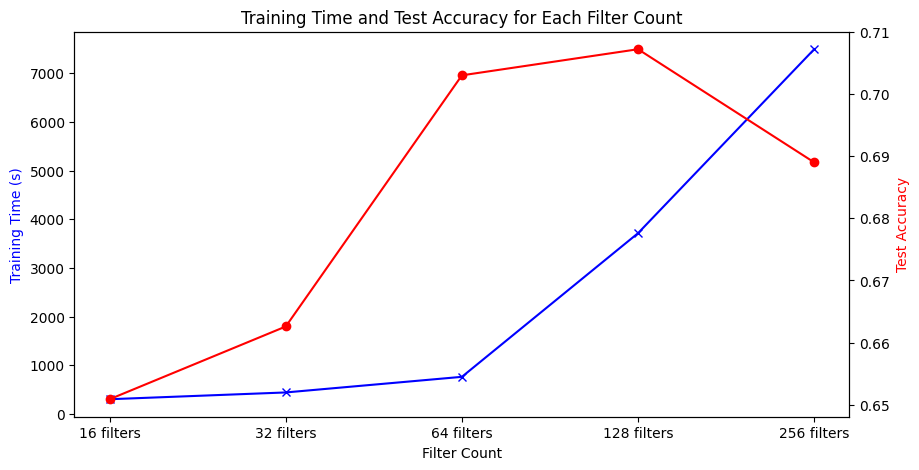

In [10]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# List to store results
training_times = []
test_accuracies = []
filter_counts = [16, 32, 64, 128, 256]  # Range for line search

# Function to create a CNN model with a specified number of filters
def create_cnn(num_filters):
    cnn = models.Sequential([
        layers.Conv2D(filters=num_filters, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=num_filters * 2, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn

# Testing models with different numbers of filters
histories = []
for num_filters in filter_counts:
    print(f"Training model with {num_filters} filters in the first layer...")

    # Create the model
    cnn = create_cnn(num_filters)
    
    # Record the start time
    start_time = time.time()
    
    # Train the model and save the history
    history = cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    histories.append(history)
    
    # Record the end time and calculate training time
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Record test accuracy from last epoch
    test_accuracy = cnn.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracies.append(test_accuracy)

# Plot training and validation accuracy for different filter counts
plt.figure(figsize=(12, 6))

for idx, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {filter_counts[idx]} Filters')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Validation Accuracy - {filter_counts[idx]} Filters')

plt.title("Training and Validation Accuracy for Different Filter Counts")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Combined plot for training times and test accuracies
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot training times
ax1.plot([str(f) + ' filters' for f in filter_counts], training_times, color='blue', marker='x')
ax1.set_xlabel("Filter Count")
ax1.set_ylabel("Training Time (s)", color='blue')

# Plot test accuracies
ax2 = ax1.twinx()
ax2.plot([str(f) + ' filters' for f in filter_counts], test_accuracies, color='red', marker='o')
ax2.set_ylabel("Test Accuracy", color='red')

plt.title("Training Time and Test Accuracy for Each Filter Count")
plt.show()


## Experiment 2C: Comments

It is evident that the training and test accuracy using 16 filters lags behind 32, 64, 128, and 256 filters significantly. It also has the shortest training time. As the number of filters increase, so does the training time and test accuracy. This is because more filters per layer allows the model to learn a larger variety of features per layer, but this means more weight parameters to optimize, thus increasing the training time. 

There best accuracy is achieved at 128 filters per layer. After this, the accuracy drops for 256 filters per layer. In the first graph, the training accuracies are still increasing while the validation accuracies level off near the end. This serves as proof that the model has possibly overtrained, mostly with the 256 filter count.

## Experiment 2D: Number of Layers

This experiment will test the effect of different numbers of convolutional layers on the accuracy and training time of the CNN model.

In [18]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Lists to store results
training_times = []
test_accuracies = []
layer_counts = [2, 3, 4]  # Range for line search

# Function to create a CNN with a variable number of convolutional layers
def create_cnn(num_layers, num_filters=32):
    cnn = models.Sequential()
    cnn.add(layers.Conv2D(filters=num_filters, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    cnn.add(layers.MaxPooling2D((2,2)))

    # Add the specified number of convolutional layers
    for _ in range(num_layers - 1):  # Subtract 1 to account for the initial layer already added
        cnn.add(layers.Conv2D(filters=num_filters * 2, kernel_size=(3,3), activation='relu', padding='same'))
        cnn.add(layers.MaxPooling2D((2,2)))

    # Add fully connected layers
    cnn.add(layers.Flatten())
    cnn.add(layers.Dense(64, activation='relu'))
    cnn.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn

# Train and evaluate models with different numbers of layers
histories = []
for num_layers in layer_counts:
    print(f"Training model with {num_layers} convolutional layers...")

    # Create the model with the specified number of layers
    cnn = create_cnn(num_layers)
    
    # Record the start time
    start_time = time.time()
    
    # Train the model and save the history
    history = cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    histories.append(history)
    
    # Record the end time and calculate training time
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Record test accuracy from last epoch
    test_accuracy = cnn.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracies.append(test_accuracy)


Training model with 2 convolutional layers...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 61ms/step - accuracy: 0.4075 - loss: 1.6219 - val_accuracy: 0.5964 - val_loss: 1.1437
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6302 - loss: 1.0554 - val_accuracy: 0.6600 - val_loss: 0.9857
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6862 - loss: 0.9002 - val_accuracy: 0.6916 - val_loss: 0.9083
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.7296 - loss: 0.7821 - val_accuracy: 0.6950 - val_loss: 0.8931
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7547 - loss: 0.6992 - val_accuracy: 0.7108 - val_loss: 0.8692
Training model with 3 convolutional layers...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 82ms/step - accuracy: 0.3716 - loss: 1.7184 - val_accuracy: 0.5666 - val_loss: 1.2116
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6137 - loss: 1.0871 - val_accuracy: 0.6120 - val

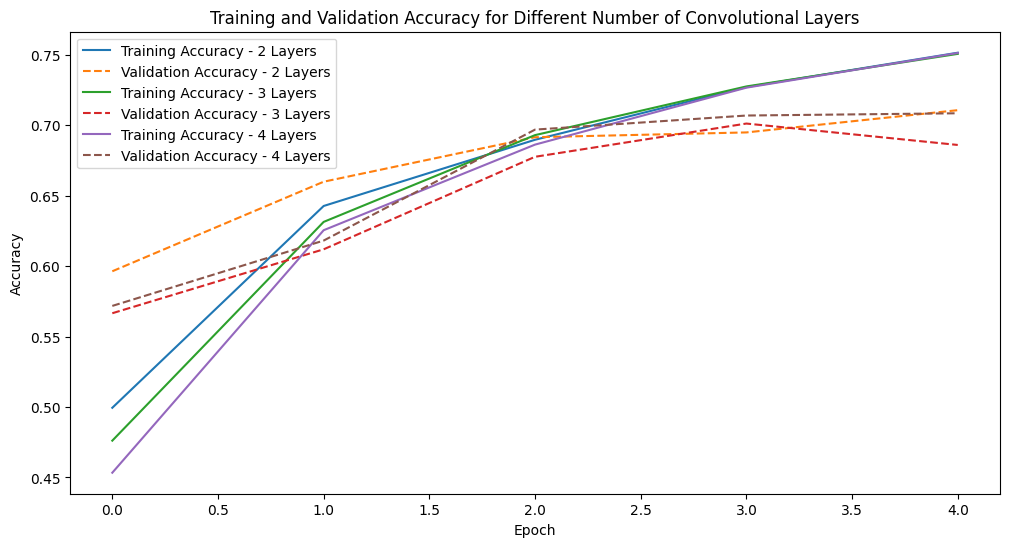

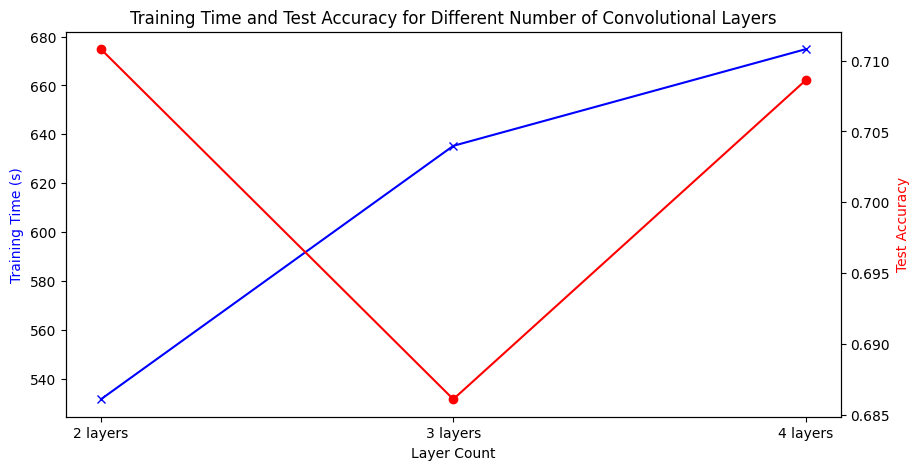

In [19]:
# Plot training and validation accuracy for different filter counts
plt.figure(figsize=(12, 6))

for idx, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {layer_counts[idx]} Layers')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Validation Accuracy - {layer_counts[idx]} Layers')

plt.title("Training and Validation Accuracy for Different Number of Convolutional Layers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Combined plot for training times and test accuracies
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot training times
ax1.plot([str(f) + ' layers' for f in layer_counts], training_times, color='blue', marker='x')
ax1.set_xlabel("Layer Count")
ax1.set_ylabel("Training Time (s)", color='blue')

# Plot test accuracies
ax2 = ax1.twinx()
ax2.plot([str(f) + ' layers' for f in layer_counts], test_accuracies, color='red', marker='o')
ax2.set_ylabel("Test Accuracy", color='red')

plt.title("Training Time and Test Accuracy for Different Number of Convolutional Layers")
plt.show()


## Experiment 2D: Comments

As expected, as the number of convolutional layers increases, the training accuracies remain almost exactly the same (they converge after 5 epochs), while the training time increases. The test accuracies for 2 - 4 layers do not vary much, with the lowest accuracy being 3 layers (68.7% accuracy) and the highest being 2 layers (71.1% accuracy). It difficult to conclude the effect of this experiment on test accuracy due to the results gathered.

## Experiment 3: Examining The First Layer

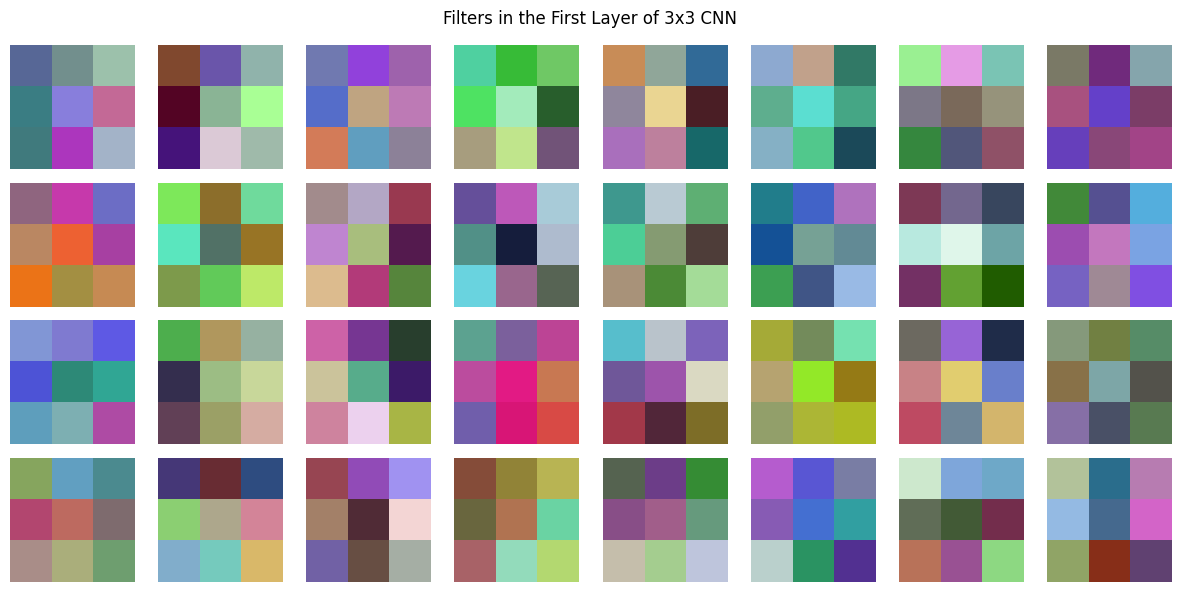

In [24]:
import matplotlib.pyplot as plt

# Function to visualize filters in a given layer
def visualize_filters(layer, title):
    filters, biases = layer.get_weights()

    # Normalize filter values
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # Determine the grid size for plotting
    num_filters = filters.shape[3]  # Total number of filters
    num_columns = 8  # Number of filters to show per row
    num_rows = num_filters // num_columns if num_filters % num_columns == 0 else (num_filters // num_columns + 1)

    # Plot filters in a grid
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 6))
    for i in range(num_filters):
        row, col = i // num_columns, i % num_columns
        ax = axes[row, col]
        ax.imshow(filters[:, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

first_layer = cnn_3x3.layers[0] 
visualize_filters(first_layer, "Filters in the First Layer of 3x3 CNN")

## Experiment 3: Comments

As shown above, the first layer looks at simple patterns and features to break down the image into different components that the deeper layers will use to find more detailed patterns and features.

# CNN CONCLUSIONS

This project shows evidence of the superiority of using CNNs instead of ANNs for image processing. The line search experiments allowed us to visualize the effect of adjusting kernel size, max pooling size, convolutional filters per layer, and number of convolutional layers on training and test accuracies of a Convolutional Neural Network. It is known that a 3x3 kernel and 2x2 max pooling size is standard for CNNs, but it was interesting to observe how much of an effect changing these parameters had on accuracy and training time. Increasing the number of convolutional filters per layer improved the accuracy of the model while worsening the training time. Increasing the number of convolutional layers in the CNN definitely increases the training time, however, does not significantly affect the accuracy of the model. Finally, visualizing the filters used in the first layer of the CNN shows the simple features (colors) that the early layers pick up that are used to find more detailed features in the later layers of the CNN.

# REFERENCES

    Tutorial for building the initial CNN
[1] codebasics, “Image classification using CNN (CIFAR10 dataset) | Deep Learning Tutorial 24 (Tensorflow & Python),” YouTube, Oct. 24, 2020. https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLa2QEgpgfe4IdX874qb09uBL4WHbS3IUg&index=1 (accessed Oct. 29, 2024).
    
    
    Overview of the structure of a CNN for accurately creating and adjusting the CNN
[2] TensorFlow, “Convolutional Neural Network (CNN)  |  TensorFlow Core,” TensorFlow, 2019. https://www.tensorflow.org/tutorials/images/cnn
    
